In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import geopandas as gpd
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore') 

In [2]:
# Load dataset
df=pd.read_csv('marketing_campaign_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200005 non-null  int64  
 1   Company           200005 non-null  object 
 2   Campaign_Type     200005 non-null  object 
 3   Target_Audience   200005 non-null  object 
 4   Duration          200005 non-null  object 
 5   Channel_Used      200005 non-null  object 
 6   Conversion_Rate   200005 non-null  float64
 7   Acquisition_Cost  200005 non-null  object 
 8   ROI               200005 non-null  float64
 9   Location          200005 non-null  object 
 10  Date              200005 non-null  object 
 11  Clicks            200005 non-null  int64  
 12  Impressions       200005 non-null  int64  
 13  Engagement_Score  200005 non-null  int64  
 14  Customer_Segment  200005 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 22.9+ MB


In [4]:
df.describe()

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200005.000000,200005.000000,200005.000000,200005.000000,200005.000000,200005.000000
mean,100003.000000,0.080069,5.002416,549.774591,5507.307107,5.494673
std,57736.614632,0.040602,1.734485,260.019354,2596.863794,2.872593
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50002.000000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100003.000000,0.080000,5.010000,550.000000,5518.000000,5.000000
75%,150004.000000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200005.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


<!-- Comparing campaign performance across different channels.
Calculating CTR, CPC, and conversion rates to assess campaign effectiveness.
Identifying high-performing and underperforming campaigns based on ROI.
Exploring location-based trends to uncover demographic or cultural influences on campaign success.
Generate at least four different and meaningful visualizations, such as:
Bar Charts, Line Graph, Heatmaps, Scatter Plots, Density Plots etc.

CTR = Clicks/impressions
CPC = total ad cost (acquisition cost / total number of clicks) How much cost 
Conversion_Rate - final destination 

In [5]:
df.Customer_Segment.value_counts()

Foodies                40210
Tech Enthusiasts       40154
Outdoor Adventurers    40011
Health & Wellness      39888
Fashionistas           39742
Name: Customer_Segment, dtype: int64

Analyze the dataset to extract meaningful insights, such as:
Comparing campaign performance across different channels.
Calculating CTR, CPC, and conversion rates to assess campaign effectiveness.
Identifying high-performing and underperforming campaigns based on ROI.
Exploring location-based trends to uncover demographic or cultural influences on campaign success.
Generate at least four different and meaningful visualizations, such as:
Bar Charts, Line Graph, Heatmaps, Scatter Plots, Density Plots etc.

CTR = Clicks/impressions
CPC = total ad cost (acquisition cost / total number of clicks
The end goal is the conversion_Rate - 
Conversion rate against campaign type to evaluate which which campaign has the better clicks (High performing versus underperforming Campaign type)
Which of these campaigns produced higher conversion rate ?
Plot CTR against customer segmnets to evaluate, which segment has the highest clicks (Heat maps) 

In [6]:
# Convert Acquisition_Cost to numeric
df["Acquisition_Cost"] = df["Acquisition_Cost"].replace('[\$,]', '', regex=True).astype(float)

In [7]:
# Calculate Click-Through Rate (CTR)
df["CTR"] = df["Clicks"] / df["Impressions"]#."%.2f"

# Calculate Cost Per Click (CPC)
df["CPC"] = df["Acquisition_Cost"] / df["Clicks"]

df.head(20)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment,CTR,CPC
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,1/1/2021,506,1922,6,Health & Wellness,0.263267,31.964427
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,1/2/2021,116,7523,7,Fashionistas,0.015419,99.706897
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,1/3/2021,584,7698,1,Outdoor Adventurers,0.075864,17.465753
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,1/4/2021,217,1820,7,Health & Wellness,0.119231,58.635945
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,1/5/2021,379,4201,3,Health & Wellness,0.090217,43.408971
5,6,DataTech Solutions,Display,All Ages,15 days,Instagram,0.07,9716.0,4.36,New York,1/6/2021,100,1643,1,Foodies,0.060864,97.160000
6,7,NexGen Systems,Email,Women 35-44,60 days,Website,0.13,11067.0,2.86,Los Angeles,1/7/2021,817,8749,10,Tech Enthusiasts,0.093382,13.545900
7,8,DataTech Solutions,Search,Men 18-24,45 days,Google Ads,0.08,13280.0,5.55,Los Angeles,1/8/2021,624,7854,7,Outdoor Adventurers,0.079450,21.282051
8,9,Alpha Innovations,Social Media,Women 35-44,15 days,Facebook,0.09,18066.0,6.73,Chicago,1/9/2021,861,1754,6,Tech Enthusiasts,0.490878,20.982578
9,10,TechCorp,Email,Women 35-44,15 days,Instagram,0.09,13766.0,3.78,Los Angeles,1/10/2021,642,3856,3,Tech Enthusiasts,0.166494,21.442368


In [8]:
# Convert 'Duration' column to numeric by extracting the number of days
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)

In [9]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [10]:
# Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%B')  # Converts month to full name (January, February, etc.

In [11]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment,CTR,CPC,Year,Month
0,1,Innovate Industries,Email,Men 18-24,30,Google Ads,0.04,16174.0,6.29,Chicago,2021-01-01,506,1922,6,Health & Wellness,0.263267,31.964427,2021,January
1,2,NexGen Systems,Email,Women 35-44,60,Google Ads,0.12,11566.0,5.61,New York,2021-02-01,116,7523,7,Fashionistas,0.015419,99.706897,2021,February
2,3,Alpha Innovations,Influencer,Men 25-34,30,YouTube,0.07,10200.0,7.18,Los Angeles,2021-03-01,584,7698,1,Outdoor Adventurers,0.075864,17.465753,2021,March
3,4,DataTech Solutions,Display,All Ages,60,YouTube,0.11,12724.0,5.55,Miami,2021-04-01,217,1820,7,Health & Wellness,0.119231,58.635945,2021,April
4,5,NexGen Systems,Email,Men 25-34,15,YouTube,0.05,16452.0,6.50,Los Angeles,2021-05-01,379,4201,3,Health & Wellness,0.090217,43.408971,2021,May


In [12]:
# To determine the high performing and underperforming campaigns
high_performing_campaign = df.loc[df["Conversion_Rate"] == df["Conversion_Rate"].max(), "Campaign_Type"].values[0]
low_performing_campaign = df.loc[df["Conversion_Rate"]== df["Conversion_Rate"].min(), "Campaign_Type"].values[0]
print(f"Highest performing campaign type: {high_performing_campaign}")
print(f"Lowest performing campaign type: {low_performing_campaign}")

Highest performing campaign type: Influencer
Lowest performing campaign type: Search


In [13]:
# Determine which campaign has the highest conversion rate
best_campaign = df.groupby("Campaign_Type")["Conversion_Rate"].mean().idxmax()
print(f"The highest performing campaign type is: {best_campaign}")

The highest performing campaign type is: Influencer


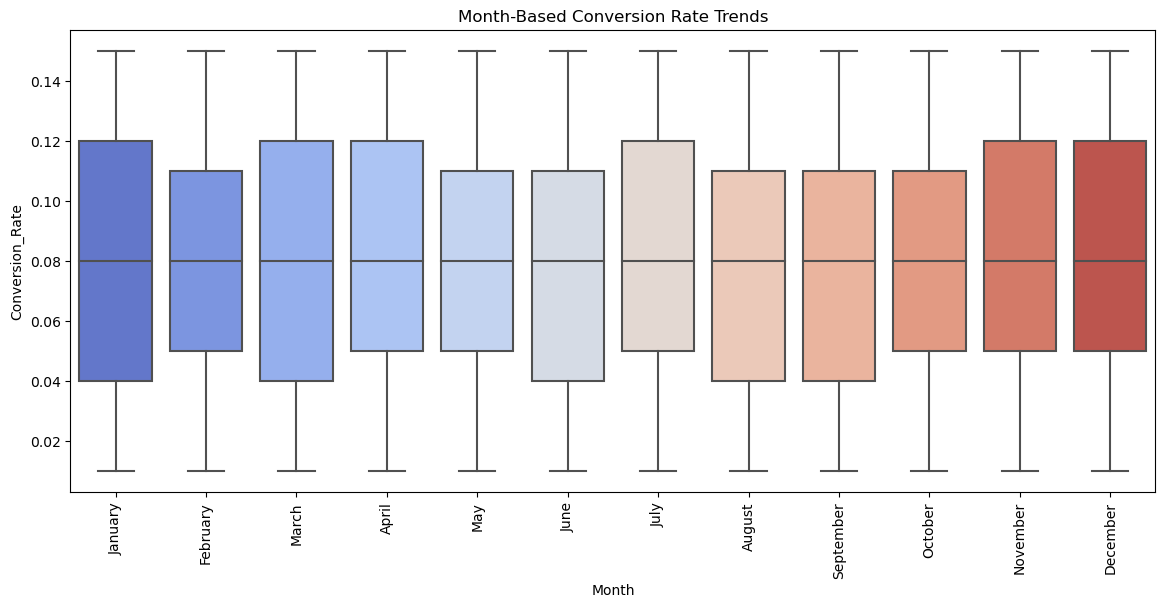

In [14]:
# Month-based trends (Conversion Rate by Month)
plt.figure(figsize=(14, 6))
sns.boxplot(x="Month", y="Conversion_Rate", data=df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Month-Based Conversion Rate Trends")
plt.show()

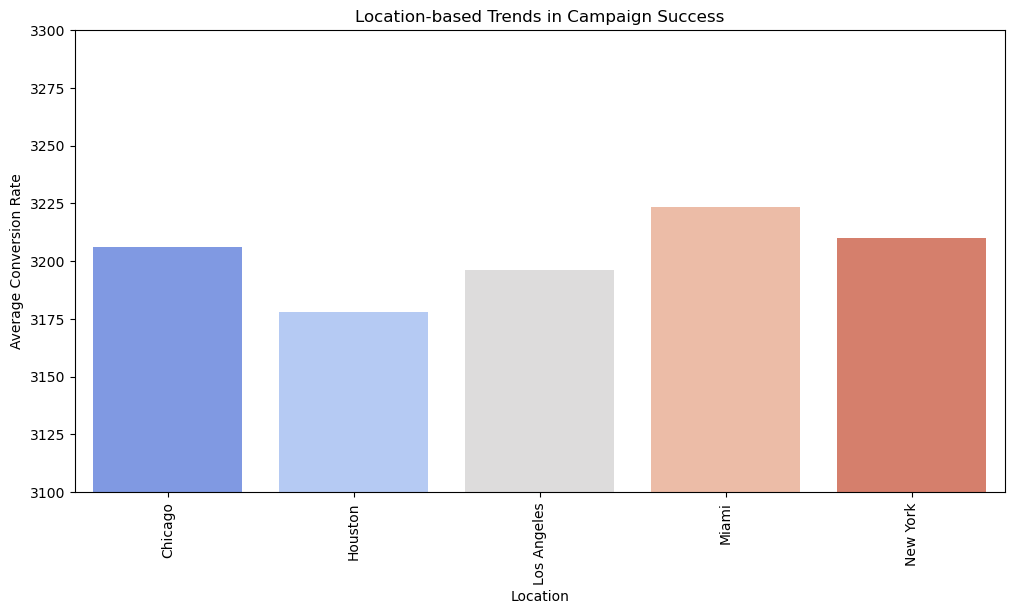

      Location  Conversion_Rate
0      Chicago          3206.27
1      Houston          3178.05
2  Los Angeles          3196.28
3        Miami          3223.43
4     New York          3210.14


In [15]:
# Analyze location-based trends
df_location = df.groupby("Location")["Conversion_Rate"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=df_location, x="Location", y="Conversion_Rate", palette="coolwarm")
plt.xlabel("Location")
plt.ylabel("Average Conversion Rate")
plt.title("Location-based Trends in Campaign Success")
plt.xticks(rotation=90)
plt.ylim(3100, 3300)
plt.show()
print(df_location)

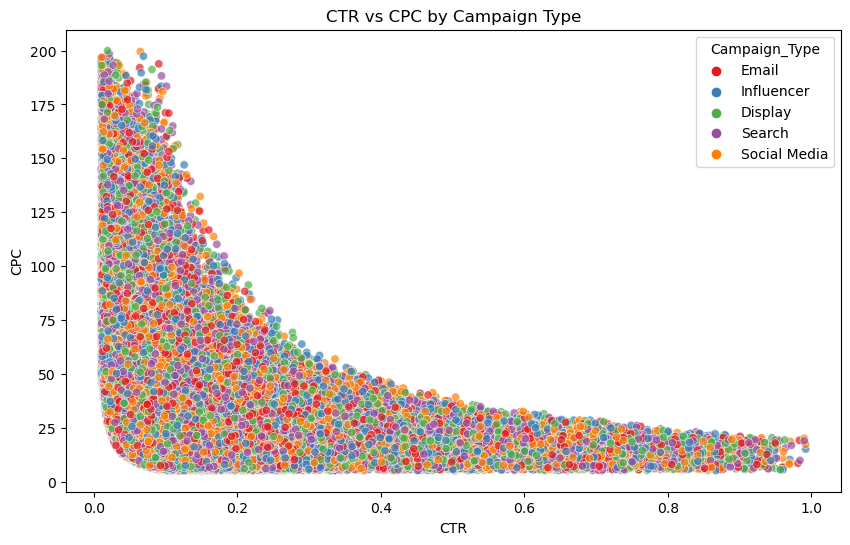

In [16]:
# Scatter Plot of CTR vs CPC to evaluate efficiency
plt.figure(figsize=(10, 6))
sns.scatterplot(x="CTR", y="CPC", hue="Campaign_Type", data=df, alpha=0.7, palette="Set1")
plt.title("CTR vs CPC by Campaign Type")
plt.show()

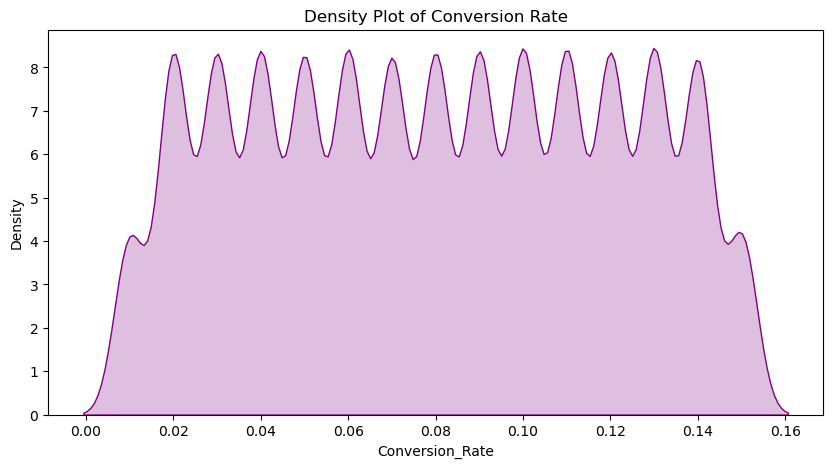

In [17]:
# Density Plot of Conversion Rate
plt.figure(figsize=(10, 5))
sns.kdeplot(df["Conversion_Rate"], shade=True, color="purple")
plt.title("Density Plot of Conversion Rate")
plt.show()

In [18]:
sum_conversion_rate = df.groupby('Location')['Conversion_Rate'].sum()

In [19]:
sum_conversion_rate

Location
Chicago        3206.27
Houston        3178.05
Los Angeles    3196.28
Miami          3223.43
New York       3210.14
Name: Conversion_Rate, dtype: float64

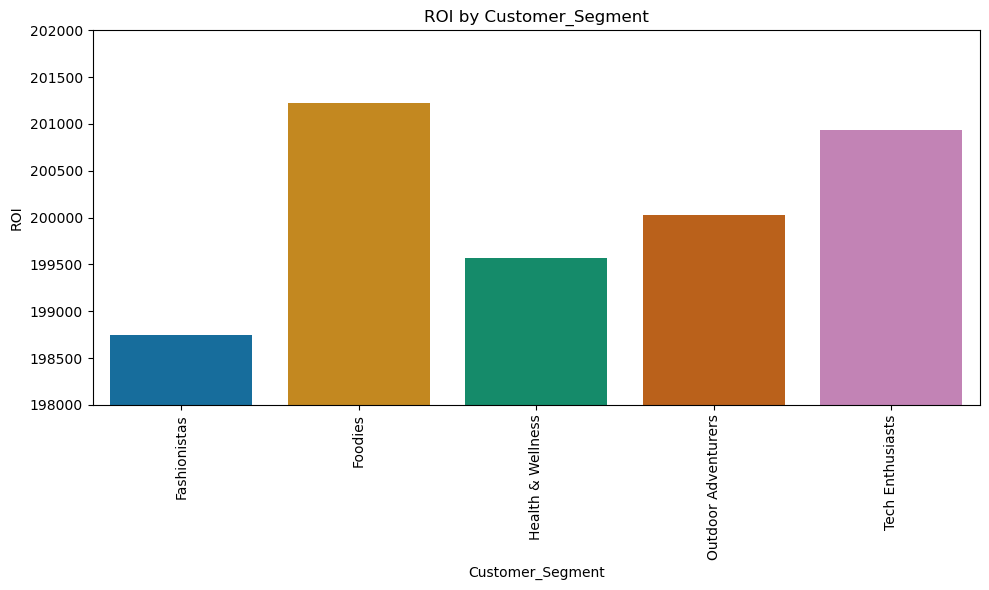

      Customer_Segment        ROI
0         Fashionistas  198748.22
1              Foodies  201223.94
2    Health & Wellness  199567.71
3  Outdoor Adventurers  200030.72
4     Tech Enthusiasts  200937.71


In [20]:
# Plot ROI versus Customer Segment
roi_by_seg = df.groupby('Customer_Segment')['ROI'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_Segment', y='ROI', data=roi_by_seg,palette='colorblind')
plt.xlabel('Customer_Segment')
plt.ylabel('ROI')
plt.title('ROI by Customer_Segment')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(198000,202000)
plt.show()
print(roi_by_seg)

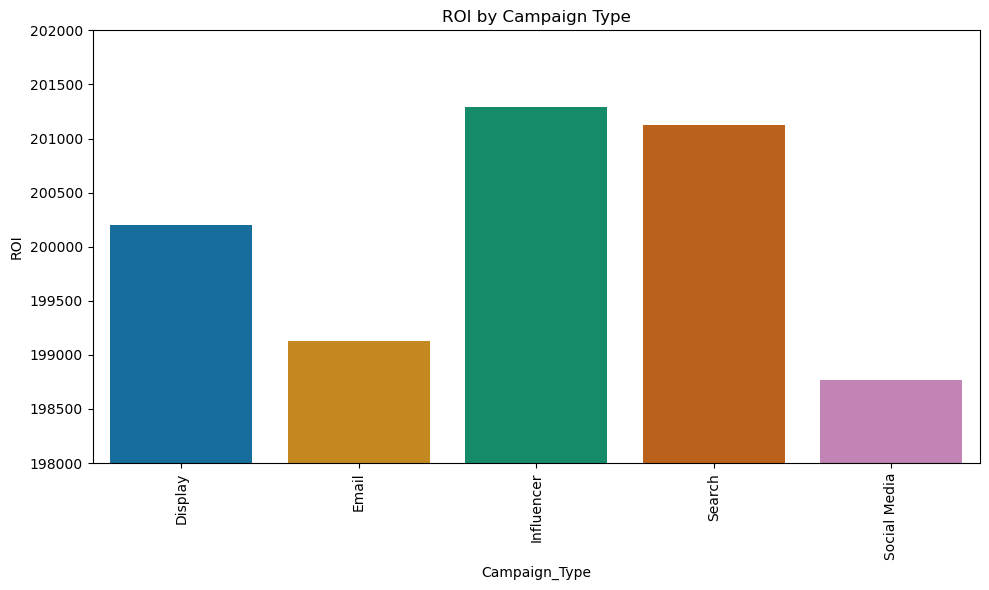

  Campaign_Type        ROI
0       Display  200199.80
1         Email  199126.70
2    Influencer  201293.46
3        Search  201120.60
4  Social Media  198767.74


In [21]:
# Plot ROI versus Customer Type
roi_by_type = df.groupby('Campaign_Type')['ROI'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign_Type', y='ROI', data=roi_by_type,palette='colorblind')
plt.xlabel('Campaign_Type')
plt.ylabel('ROI')
plt.title('ROI by Campaign Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(198000,202000)
plt.show()
print(roi_by_type)

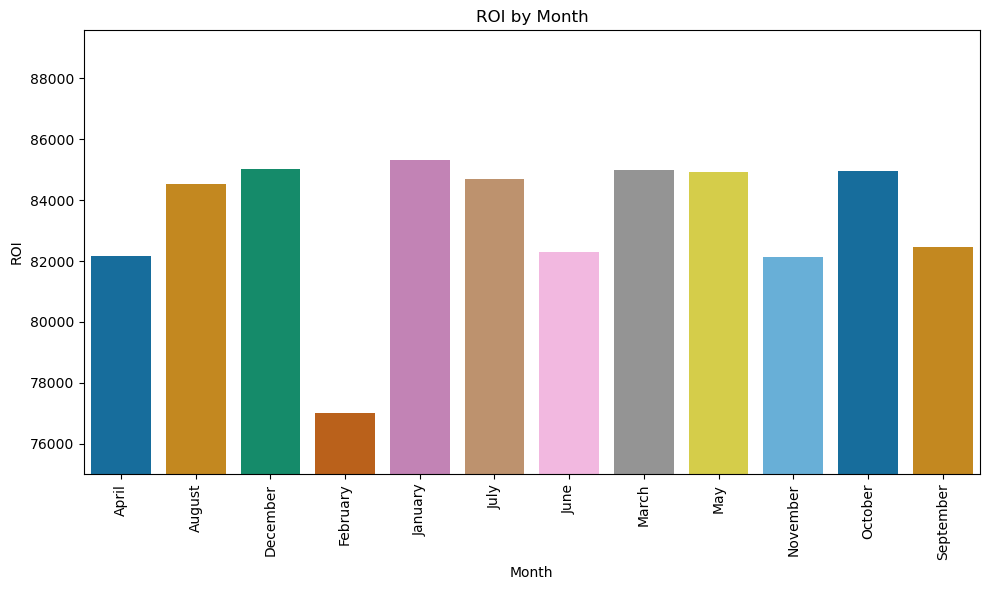

        Month       ROI
0       April  82168.57
1      August  84543.97
2    December  85025.36
3    February  76992.53
4     January  85316.62
5        July  84688.92
6        June  82301.42
7       March  84981.96
8         May  84915.09
9    November  82136.06
10    October  84972.57
11  September  82465.23


In [22]:
# Plot ROI by Month
roi_by_Month = df.groupby('Month')['ROI'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='ROI', data=roi_by_Month,palette='colorblind')
plt.xlabel('Month')
plt.ylabel('ROI')
plt.title('ROI by Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(75000,None)
plt.show()
print(roi_by_Month)

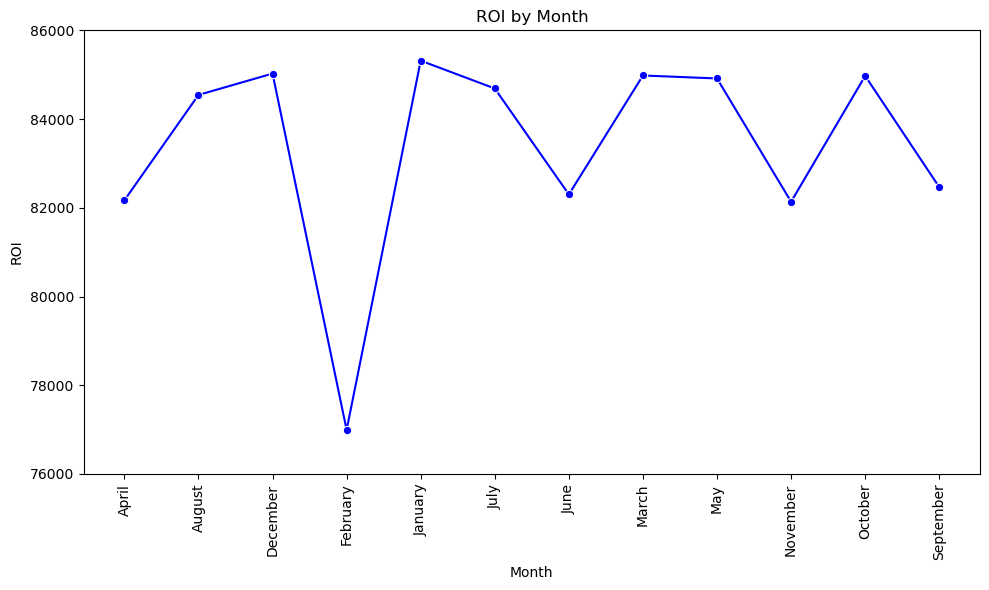

        Month       ROI
0       April  82168.57
1      August  84543.97
2    December  85025.36
3    February  76992.53
4     January  85316.62
5        July  84688.92
6        June  82301.42
7       March  84981.96
8         May  84915.09
9    November  82136.06
10    October  84972.57
11  September  82465.23


In [23]:
# Plot ROI by Month
roi_by_Month = df.groupby('Month')['ROI'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='ROI', data=roi_by_Month, marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('ROI')
plt.title('ROI by Month')
plt.xticks(rotation=90)
plt.ylim(76000, 86000)
plt.grid(False)
plt.tight_layout()
plt.show()
print(roi_by_Month)

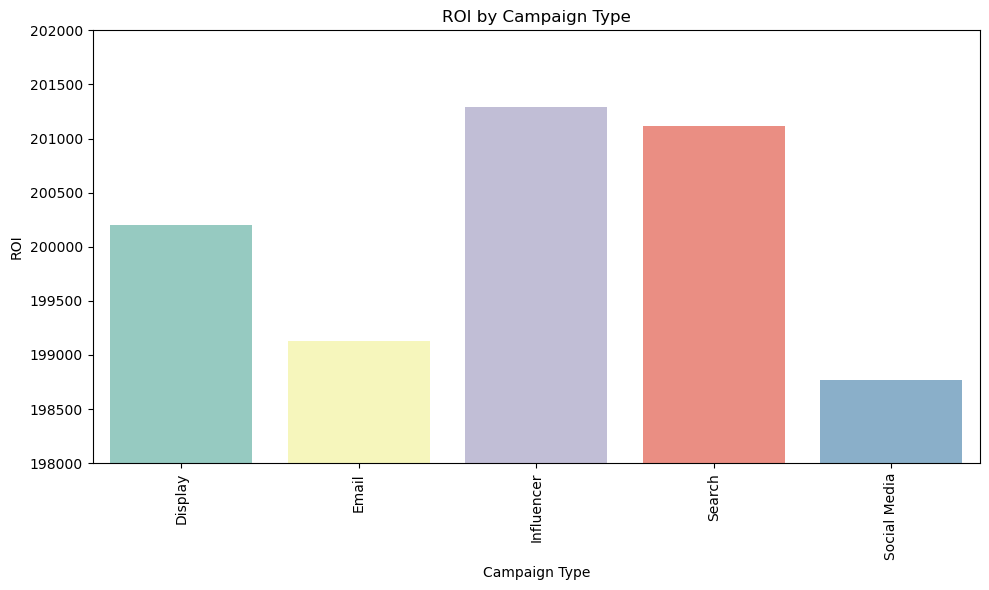

  Campaign_Type        ROI
0       Display  200199.80
1         Email  199126.70
2    Influencer  201293.46
3        Search  201120.60
4  Social Media  198767.74


In [24]:
# Ploting ROI versus Campaign Type
roi_by_campaign = df.groupby('Campaign_Type')['ROI'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign_Type', y='ROI', data=roi_by_campaign,palette='Set3')
plt.xlabel('Campaign Type')
plt.ylabel('ROI')
plt.title('ROI by Campaign Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(198000,202000)
plt.show()
print(roi_by_campaign)

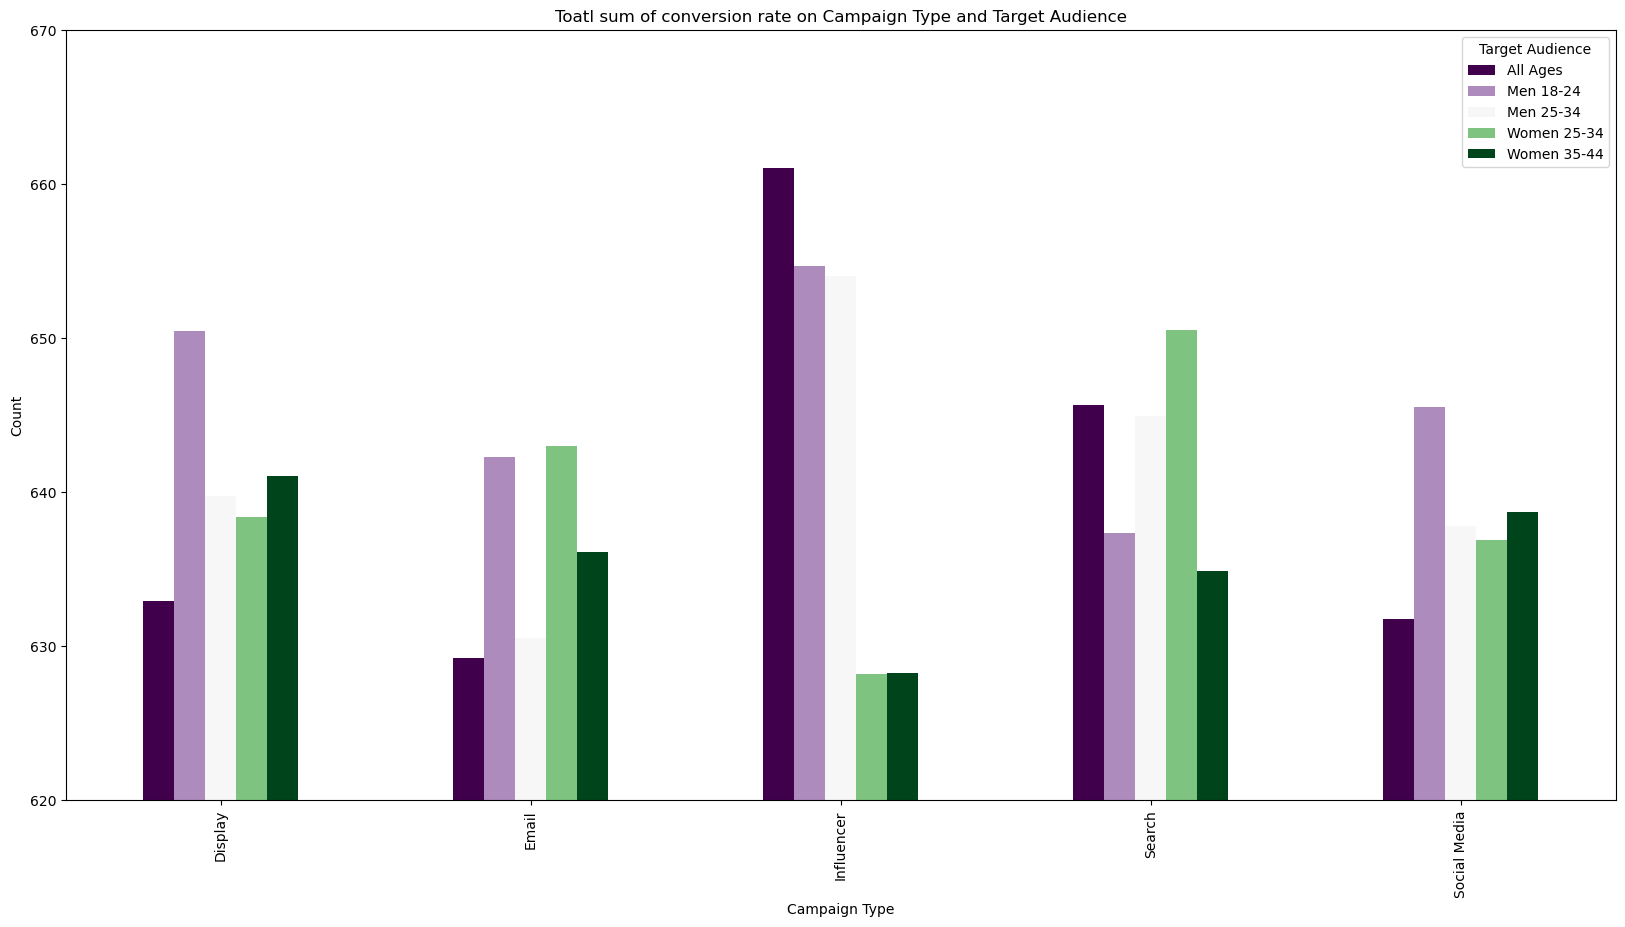

Campaign_Type  Target_Audience
Display        All Ages           632.92
               Men 18-24          650.47
               Men 25-34          639.77
               Women 25-34        638.36
               Women 35-44        641.04
Email          All Ages           629.26
               Men 18-24          642.28
               Men 25-34          630.54
               Women 25-34        643.00
               Women 35-44        636.09
Influencer     All Ages           661.07
               Men 18-24          654.67
               Men 25-34          654.04
               Women 25-34        628.19
               Women 35-44        628.29
Search         All Ages           645.68
               Men 18-24          637.37
               Men 25-34          644.95
               Women 25-34        650.53
               Women 35-44        634.87
Social Media   All Ages           631.74
               Men 18-24          645.56
               Men 25-34          637.83
               Women 25-34

In [25]:
# Ploting Campaign Type,and Target Audience against total sum of Conversion Rate
con = df.groupby(['Campaign_Type', 'Target_Audience'])['Conversion_Rate'].sum()
con.unstack().plot(kind='bar', figsize=(20, 10),colormap='PRGn')
plt.xlabel('Campaign Type')
plt.ylabel('Count')
plt.title('Toatl sum of conversion rate on Campaign Type and Target Audience')
plt.legend(title='Target Audience')
plt.ylim(620,670)
plt.show()
print(con)

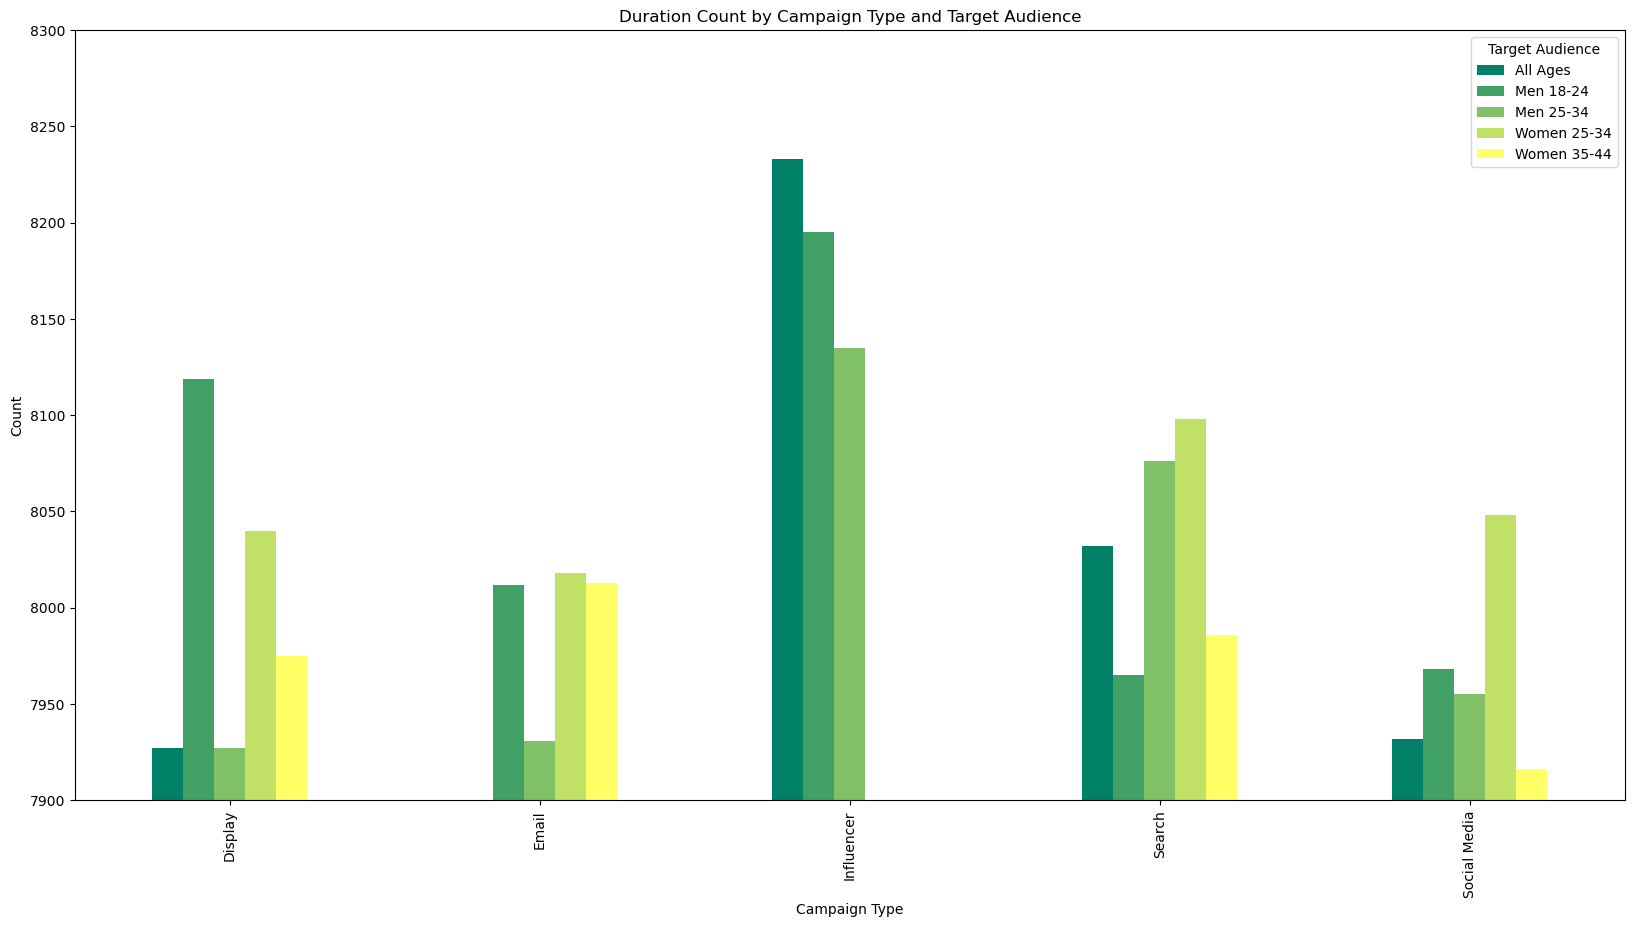

Campaign_Type  Target_Audience
Display        All Ages           7927
               Men 18-24          8119
               Men 25-34          7927
               Women 25-34        8040
               Women 35-44        7975
Email          All Ages           7897
               Men 18-24          8012
               Men 25-34          7931
               Women 25-34        8018
               Women 35-44        8013
Influencer     All Ages           8233
               Men 18-24          8195
               Men 25-34          8135
               Women 25-34        7809
               Women 35-44        7798
Search         All Ages           8032
               Men 18-24          7965
               Men 25-34          8076
               Women 25-34        8098
               Women 35-44        7986
Social Media   All Ages           7932
               Men 18-24          7968
               Men 25-34          7955
               Women 25-34        8048
               Women 35-44       

In [26]:
# Duration Count by Campaign Type and Target Audience
dd = df.groupby(['Campaign_Type', 'Target_Audience'])['Duration'].count()
dd.unstack().plot(kind='bar', figsize=(20, 10),colormap='summer')
plt.xlabel('Campaign Type')
plt.ylabel('Count')
plt.title('Duration Count by Campaign Type and Target Audience')
plt.legend(title='Target Audience')
plt.ylim(7900, 8300)
plt.show()
print(dd)

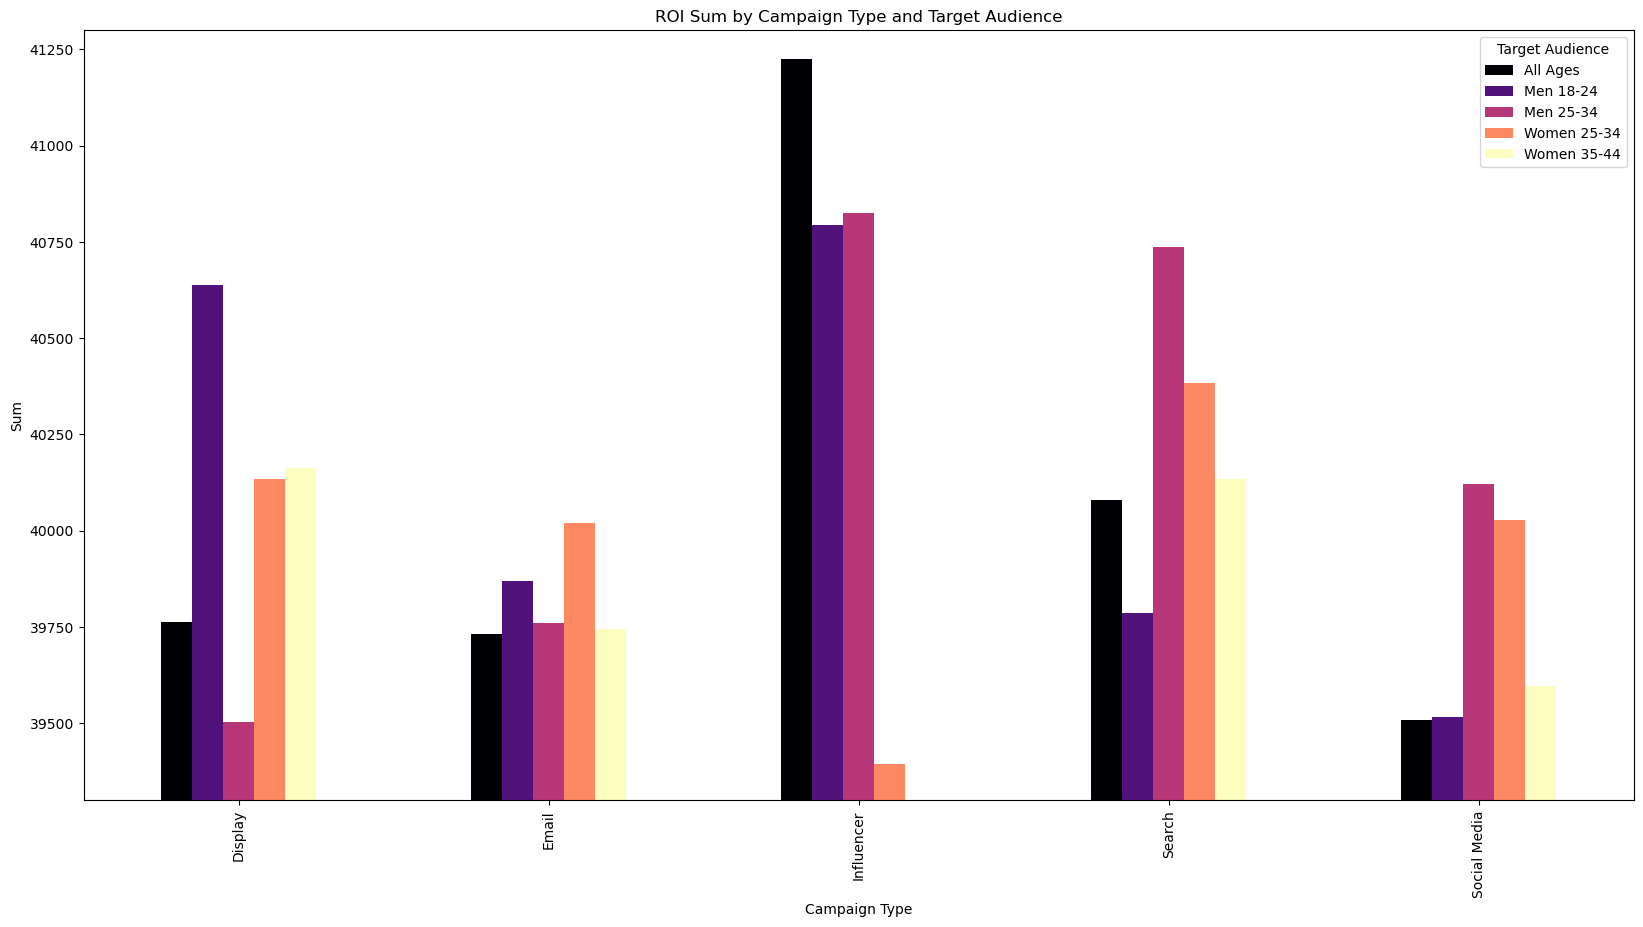

Campaign_Type  Target_Audience
Display        All Ages           39763.30
               Men 18-24          40638.51
               Men 25-34          39501.88
               Women 25-34        40133.08
               Women 35-44        40163.03
Email          All Ages           39732.28
               Men 18-24          39868.67
               Men 25-34          39760.72
               Women 25-34        40020.77
               Women 35-44        39744.26
Influencer     All Ages           41224.50
               Men 18-24          40794.31
               Men 25-34          40825.07
               Women 25-34        39393.78
               Women 35-44        39055.80
Search         All Ages           40079.77
               Men 18-24          39786.28
               Men 25-34          40736.94
               Women 25-34        40383.57
               Women 35-44        40134.04
Social Media   All Ages           39508.91
               Men 18-24          39515.19
               Men 25-3

In [27]:
# ROI Sum by Campaign Type and Target Audience
roi = df.groupby(['Campaign_Type', 'Target_Audience'])['ROI'].sum()
roi.unstack().plot(kind='bar', figsize=(20, 10),colormap='magma')
plt.xlabel('Campaign Type')
plt.ylabel('Sum')
plt.title('ROI Sum by Campaign Type and Target Audience')
plt.legend(title='Target Audience')
plt.ylim(39300, 41300)
plt.show()
print(roi)

Company
Alpha Innovations      200493.05
DataTech Solutions     200288.94
Innovate Industries    198641.87
NexGen Systems         199609.18
TechCorp               201475.26
Name: ROI, dtype: float64


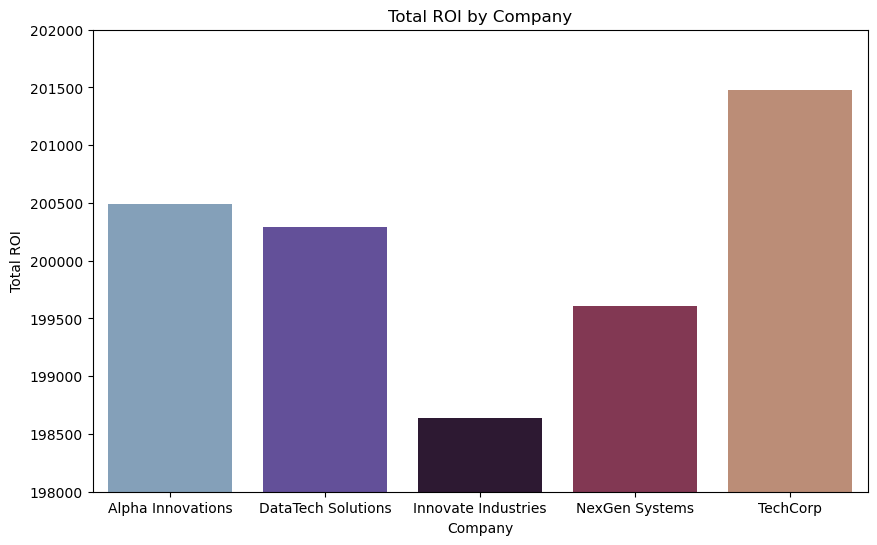

In [28]:
# Total ROI for each company
print(df.groupby('Company')['ROI'].sum())
plt.figure(figsize=(10,6))
sns.barplot(x=df.groupby('Company')['ROI'].sum().index, 
             y=df.groupby('Company')['ROI'].sum().values,palette='twilight')

plt.xlabel('Company')
plt.ylabel('Total ROI')
plt.title('Total ROI by Company')
plt.ylim(198000, 202000)
plt.show()

<Figure size 1000x600 with 0 Axes>

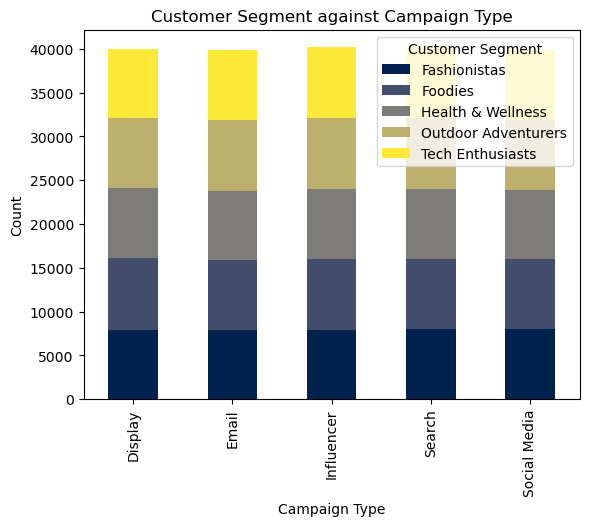

Customer_Segment  Fashionistas  Foodies  Health & Wellness  \
Campaign_Type                                                
Display                   7871     8210               7976   
Email                     7865     7975               7954   
Influencer                7946     8105               7996   
Search                    8011     7951               8053   
Social Media              8049     7969               7909   

Customer_Segment  Outdoor Adventurers  Tech Enthusiasts  
Campaign_Type                                            
Display                          8030              7901  
Email                            8044              8033  
Influencer                       8009              8114  
Search                           8034              8108  
Social Media                     7894              7998  


In [29]:
# Customer Segment against campaign type
customer_segment_by_campaign = df.groupby(['Campaign_Type', 'Customer_Segment']).size().reset_index(name='Count')
pivot_table = customer_segment_by_campaign.pivot(index='Campaign_Type', 
                                                 columns='Customer_Segment', values='Count')

# Plot the data
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=True,colormap='cividis')
plt.xlabel('Campaign Type')
plt.ylabel('Count')
plt.title('Customer Segment against Campaign Type')
plt.legend(title='Customer Segment')
plt.show()
print(pivot_table)

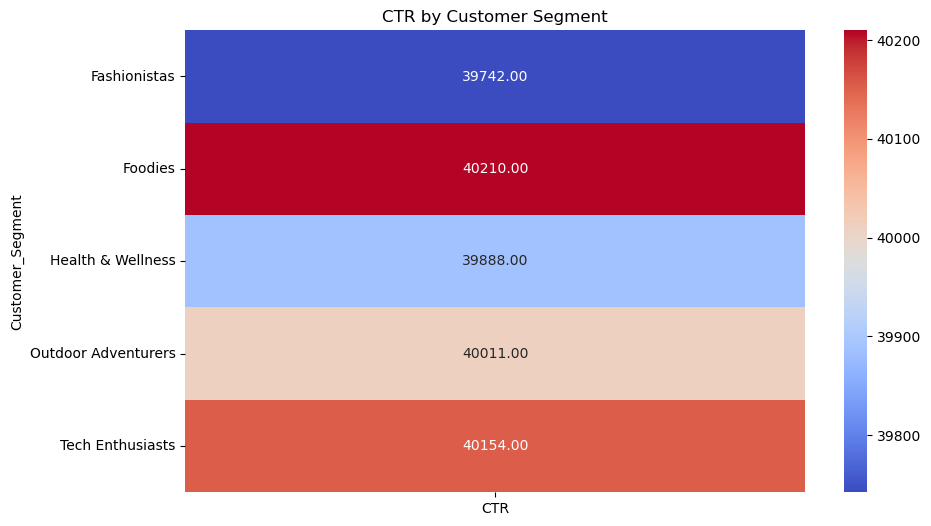

In [30]:
# Heatmap of CTR by Customer Segment
pivot_table = df.pivot_table(values="CTR", index="Customer_Segment", aggfunc="count")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("CTR by Customer Segment")
plt.show()

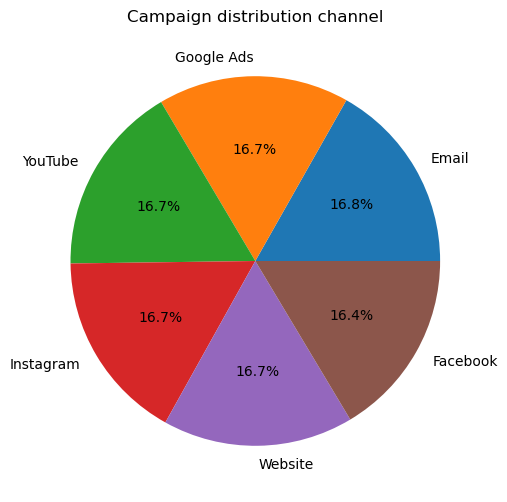

In [31]:
# Count the occurrences of each channel used
channel_counts = df['Channel_Used'].value_counts()
#pie chart to visualize the Campaign distribution channel
plt.figure(figsize=(10, 6))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%')
plt.title('Campaign distribution channel')
plt.show()

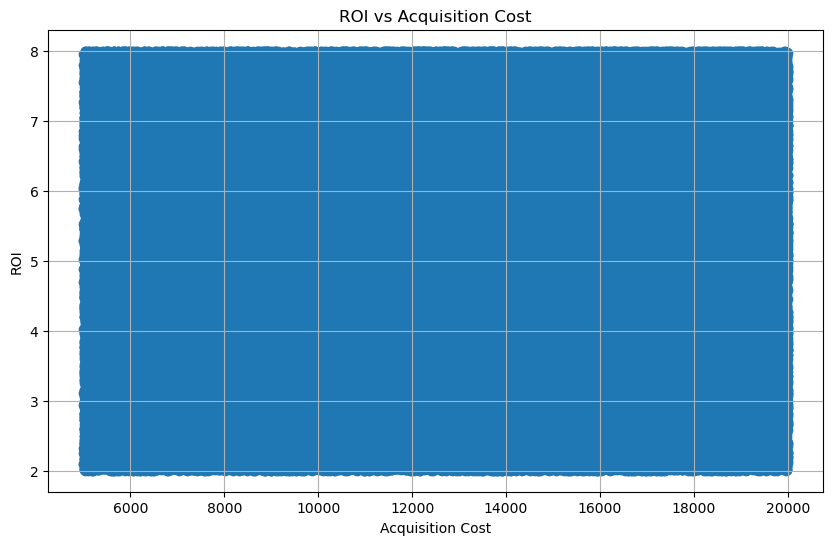

In [32]:
# # ROI versus Acquisition Cost to  Identify the campaigns with the highest ROI and optimize their marketing budget allocation.
plt.figure(figsize=(10, 6))
plt.scatter(df['Acquisition_Cost'], df['ROI'])
plt.xlabel('Acquisition Cost')
plt.ylabel('ROI')
plt.title('ROI vs Acquisition Cost')
plt.grid(True)
plt.show()